
## Life Span Trends: Analyzing Longevity

### Project Description:
Our aim is to uncover what contributes to longer life, by analyzing factors that contribute to longer lifespans covering economic gdp, health diseases, and spending on healthcare by countries.

### Research Questions to Answer:
1. On average, do people in developed or developing countries live longer?
2. Do countries with high gdp spend more on health (%) expenditure
3. Do countries that spend more on health exp have less diseases
    - vs average diseases (for each)
    - what are the 5 countries with the least amount of diseases have a higher life expectancy

Dataset: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

Note: Question 1 will be answered the below script. For Question 2 and Question 3, please review Lakshmi and Jasleen's findings.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path 
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# The path to our CSV file
life_expectancy_data = Path("Life Expectancy Data.csv")

# Read our Life Expectancy data into pandas
life_expectancy_df = pd.read_csv(life_expectancy_data)

In [2]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
print(f"Number of countries in the final file is {life_expectancy_df['Country'].nunique()}")

Number of countries in the final file is 193


## Data Cleaning

In [4]:
# Assuming life_expectancy_df is your DataFrame containing the data
# Find the first year
first_year = life_expectancy_df['Year'].min()

# Find the last year
last_year = life_expectancy_df['Year'].max()

print(first_year)
print(last_year)

2000
2015


In [5]:
# List of the range of years for the analysis

years_list = list(range(first_year,last_year +1, 1))

years_list

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

In [6]:
# Get a list of all of our columns for easy reference
life_expectancy_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
# Remove unnecessary columns
lifee_reduced = life_expectancy_df.drop(columns=['percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources'])

# Rename column Country Name to align with other datasets
lifee_reduced.rename(columns={'Life expectancy ': 'Life expectancy'}, inplace=True)

lifee_reduced.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Population,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,33736494.0,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,327582.0,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,31731688.0,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,3696958.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,2978599.0,9.5


In [8]:
# Count the number of rows for each country
country_row_counts = lifee_reduced['Country'].value_counts()

# Print the result
print(country_row_counts.tail(15))

# Export the DataFrame to a CSV file to check just to make sure
# so we can decide if we need to drop any countries that do not have all the years
# country_row_counts.to_csv('country_row_counts.csv', index=False)

Country
Gabon                    16
Gambia                   16
Georgia                  16
Germany                  16
Ghana                    16
Tuvalu                    1
Cook Islands              1
Marshall Islands          1
Monaco                    1
Palau                     1
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, dtype: int64


In [9]:
# Filtered out countries with only 1 year of data
# Group the data by country and count the number of years for each country
country_counts = lifee_reduced.groupby('Country')['Year'].count()

# Then, filter out the countries with only one year of data
countries_with_multiple_years = country_counts[country_counts > 1].index.tolist()

# Finally, filter the original DataFrame to include only the countries with more than one year of data
filtered_df = lifee_reduced[lifee_reduced['Country'].isin(countries_with_multiple_years)]

filtered_df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Population,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,33736494.0,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,327582.0,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,31731688.0,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,3696958.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,2978599.0,9.5


#### Population
'Population' only shows it has non-null value of 2286 out of 2938.
Let's check to see what are countries with the null value

In [10]:
# Filter the DataFrame to include only rows where Population is NaN
countries_with_nan_population = filtered_df[filtered_df['Population'].isna()]

# Export the DataFrame to a CSV file to check just to make sure
# so we can decide if we need to drop
# countries_with_nan_population.to_csv('countries_with_nan_population.csv', index=False)

# Get unique country names
unique_countries_with_nan_population = countries_with_nan_population['Country'].unique()

# Print the unique country names
unique_countries_with_nan_population



array(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Brunei Darussalam',
       "Côte d'Ivoire", 'Congo', 'Cuba', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Egypt', 'Eritrea', 'Gambia',
       'Grenada', 'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Libya',
       'Micronesia (Federated States of)', 'New Zealand', 'Oman', 'Qatar',
       'Republic of Korea', 'Republic of Moldova', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Somalia', 'The former Yugoslav republic of Macedonia',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype=object)

### Discussion - Population data
The Population series were missing data of 41 countries, including prominent nations like the United States, the United Kingdom and New Zealand, posing a significant limitation. While merging with additional datasets could address this gap, the dynamic nature of populations due to factors like immigration introduces complexity and potential distortions in analyzing their relationship with life expectancies.

RE option: find another dataset for a merge

Example:
https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

About this another dataset for further use:
Provide population count in 5-year intervals (i.e. 2015 Population, 2010 Population, 2000 Population) and a series on Growth Rate. 
Users can create an estimate on total population by country from 2000 to 2015 using calcuation. 

Vertical list of data available: ['Rank','CCA3', 'Country/Territory', 'Capital', 'Continent', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (kmÂ²)', 'Density (per kmÂ²)', 'Growth Rate', 'World Population Percentage']

## Question 1: On average, do people in developed or developing countries live longer?

In [11]:
# Calculate the average Life Expectancy in age
per_country_status = life_expectancy_df.groupby("Country")["Status"].unique().str[0]
per_country_status.head()

Country
Afghanistan            Developing
Albania                Developing
Algeria                Developing
Angola                 Developing
Antigua and Barbuda    Developing
Name: Status, dtype: object

In [12]:
# Calculate the average Life Expectancy in age
per_country_life_ex = life_expectancy_df.groupby("Country")["Life expectancy "].mean()
per_country_life_ex.head()


Country
Afghanistan            58.19375
Albania                75.15625
Algeria                73.61875
Angola                 49.01875
Antigua and Barbuda    75.05625
Name: Life expectancy , dtype: float64

In [13]:
# Calculate the average Life Expectancy in age
per_country_avg_p = filtered_df.groupby("Country")["Population"].mean().map('{:,.0f}'.format)
print(per_country_avg_p.tail(25))

Country
Syrian Arab Republic                                     6,741,445
Tajikistan                                               4,751,355
Thailand                                                31,170,510
The former Yugoslav republic of Macedonia                      nan
Timor-Leste                                                460,196
Togo                                                     3,722,046
Tonga                                                       26,590
Trinidad and Tobago                                        776,133
Tunisia                                                  3,274,493
Turkey                                                  33,501,353
Turkmenistan                                             2,635,550
Uganda                                                  15,540,587
Ukraine                                                 10,004,933
United Arab Emirates                                           nan
United Kingdom of Great Britain and Northern Ireland  

In [14]:
# Calculate the average Adult Mortality 
# (Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population))

per_country_adult_mor = filtered_df.groupby("Country")["Adult Mortality"].mean()
per_country_adult_mor

Country
Afghanistan                           269.0625
Albania                                45.0625
Algeria                               108.1875
Angola                                328.5625
Antigua and Barbuda                   127.5000
                                        ...   
Venezuela (Bolivarian Republic of)    163.0000
Viet Nam                              126.5625
Yemen                                 211.8125
Zambia                                354.3125
Zimbabwe                              462.3750
Name: Adult Mortality, Length: 183, dtype: float64

In [15]:
# Calculate the average infant deaths
# infant deaths (Number of Infant Deaths per 1000 population)

per_country_infant_deaths = filtered_df.groupby("Country")["infant deaths"].mean()
per_country_infant_deaths

Country
Afghanistan                           78.2500
Albania                                0.6875
Algeria                               20.3125
Angola                                83.7500
Antigua and Barbuda                    0.0000
                                       ...   
Venezuela (Bolivarian Republic of)     9.3750
Viet Nam                              29.1875
Yemen                                 39.3750
Zambia                                33.4375
Zimbabwe                              26.5625
Name: infant deaths, Length: 183, dtype: float64

In [20]:
# Create a DataFrame called `per_country_summary` with columns for the calculations above.
per_country_summary = pd.DataFrame({"Country_status": per_country_status,
                                    "Avg. Population": per_country_avg_p,
                                    "Avg. Life Expectancy": per_country_life_ex,
                                    "Adult Mortality Rates": per_country_adult_mor,
                                    "Avg. Infant Deaths":per_country_infant_deaths})

per_country_summary = per_country_summary.sort_values(["Avg. Life Expectancy"],ascending=False)

drop_per_country_summary = pd.DataFrame.dropna(per_country_summary,how="any")

drop_per_country_summary


,Country_status,Avg. Population,Avg. Life Expectancy,Adult Mortality Rates,Avg. Infant Deaths
Country,,,,,
Japan,Developed,"97,384",82.53750,57.1250,2.8750
Sweden,Developed,"5,514,868",82.51875,59.1875,0.0000
Iceland,Developed,"186,178",82.44375,49.3750,0.0000
Switzerland,Developed,"5,913,242",82.33125,55.7500,0.0000
France,Developing,"27,581,733",82.21875,73.1250,2.9375
...,...,...,...,...,...
Malawi,Developing,"6,700,263",49.89375,424.4375,37.1250
Angola,Developing,"10,147,099",49.01875,328.5625,83.7500
Lesotho,Developing,"1,200,528",48.78125,550.0625,4.5000


In [17]:
status_counts = drop_per_country_summary['Country_status'].value_counts()
status_counts

Country_status
Developing    151
Developed      32
Name: count, dtype: int64

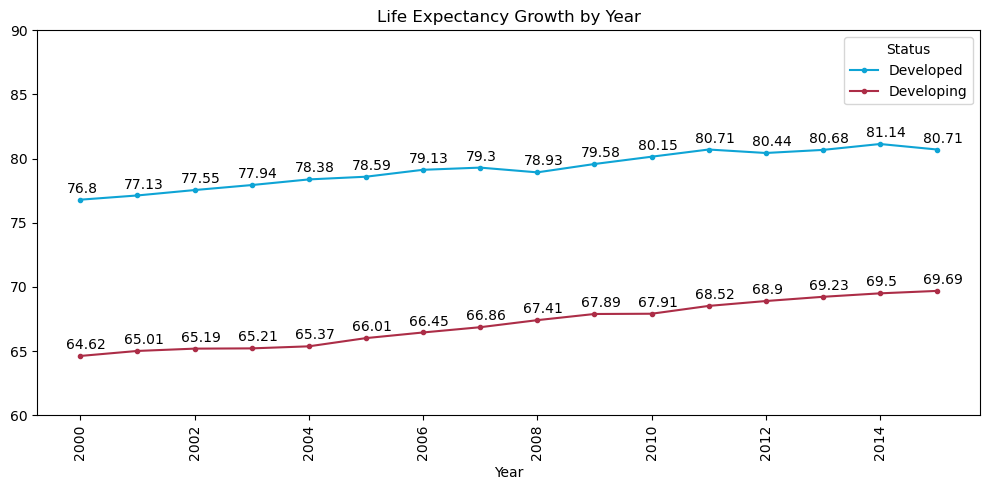

In [19]:
developed_df = filtered_df.loc[:, ["Year", "Status", "Life expectancy"]]
developed_df = developed_df.dropna(how="any")

developed_group_df = developed_df.groupby(["Status", "Year"])
average = developed_group_df.mean().round(2)

# Define colors for each status
colors = {"Developed": "#0EA4D5", "Developing": "#AC2D47"}

# Plot the line graph with different colors for each status and smaller circle markers
ax = average["Life expectancy"].unstack(level=0).plot(kind="line", figsize=(10, 5), rot=90, color=colors, marker='o', markersize=3)

# Add data labels
for status in colors:
    for year, life_expectancy in average["Life expectancy"][status].items():
        ax.annotate(f'{life_expectancy}', xy=(year, life_expectancy), xytext=(-10, 5), textcoords='offset points')

# Add legend
ax.legend(title="Status")

# Set y-axis range from 60 to 90
ax.set_ylim(60, 90)

plt.title("Life Expectancy Growth by Year")
plt.tight_layout()
plt.show()



### Discussion - On average do developed or developing countries live longer?
On average, developed countries tend to have a higher life expectancy compared to developing countries, even we can see an increase in both statuses over the years.

The average life expectancy for Developed Countries ranges between 76.8 to 80.71 years.
The average life expectancy for Developing Countries ranges between 64.62 to 69.69 years.




## Further Exploration on the Series/ the Columns in the dataset
Note: The below will not make it to the main presentation, but are good preparation materials for FAQs, as it provides further readings into the existing dataset on factors influencing life expectancy.


### Schooling v.s. Life expectancy

The r-value is: 0.751975462736698


Text(0.5, 1.0, 'Schooling V.S. Life expectancy ')

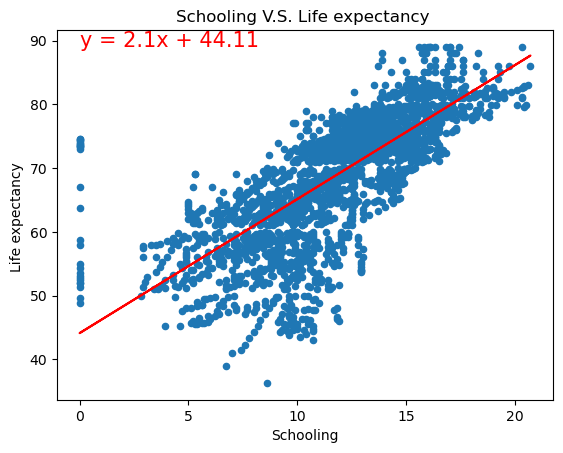

In [ ]:
# Schooling v.s. Life expectancy

y_data="Life expectancy "
x_data="Schooling"
xy_df=life_expectancy_df.loc[:,[x_data,y_data]]

xy_df=pd.DataFrame.dropna(xy_df,how="any")
xy_df.plot(kind="scatter",x=x_data,y=y_data)

x=xy_df[x_data]
y=xy_df[y_data]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, ((x.min(),y.max())), fontsize=15, color="red") 
plt.title(f"{x_data} V.S. {y_data}")

### Discussion - Schooling v.s. Life Expectancy
While there looks to be correlation coefficient (r-value of 0.75) between schooling and life expectancy, this relationship can be interpreted differently. 

Improved education is often associated with greater awareness of health risks, and better access to preventive healthcare knowledges, resulting in health behaviors and longer life expectancy. 

However, we can also say that longer life expectancy leads to increased years of schooling, as individuals have more time to pursue education before entering the workforce. 


### Alcohol v.s. Life expectancy

The r-value is: 0.4048767611266021


Text(0.5, 1.0, 'Alcohol V.S. Life expectancy ')

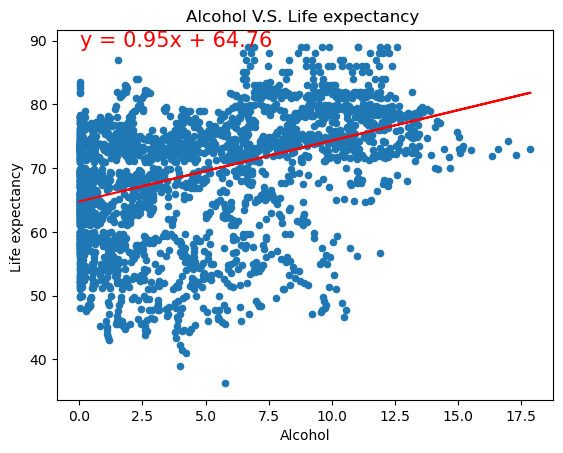

In [ ]:
#Alcohol v.s. Life expectancy
y_data="Life expectancy "
x_data="Alcohol"
xy_df=life_expectancy_df.loc[:,[x_data,y_data]]

xy_df=pd.DataFrame.dropna(xy_df,how="any")
xy_df.plot(kind="scatter",x=x_data,y=y_data)

x=xy_df[x_data]
y=xy_df[y_data]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
print(f"The r-value is: {rvalue}")
line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"
regress_values = x * slope + intercept

plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, ((x.min(),y.max())), fontsize=15, color="red") 
plt.title(f"{x_data} V.S. {y_data}")

### Discussion - Alcohol v.s. Life expectancy
RE: Topic "Dataset Limitation" in the main presentation

Even though the dataset provides alcohol consumption data recorded per capita for aged 15+, its scope is limited to the volume of pure alcohol consumed. This restricts the ability to establish meaningful correlations between alcohol consumption and life expectancy. Further research incorporating variables such as the type of alcohol consumed, like red wine, beer, hard liquor, or the context of consumption, such as social occasions and cultural practices may yield more better insights into this relationship. 